<a href="https://colab.research.google.com/github/FairozAhmadSheikh/Tensor_Flow/blob/main/02_Neural_Network_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.19.0


In [3]:
# Creating features
X=tf.constant([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

In [4]:
# Create Labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

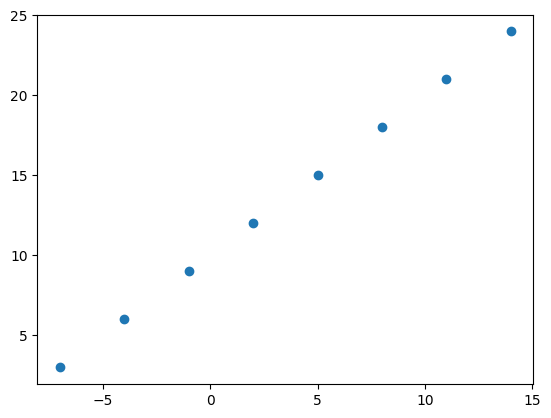

In [5]:
# Visulize it
plt.scatter(X,y)


# **Create a  demo tensor for our housing price prediction problem**

In [6]:
house_info=tf.constant(['bedroom','bathroom','garaage'])
house_price=tf.constant([971325])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garaage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([971325], dtype=int32)>)

In [7]:
input_shape=X.shape
output_shape=y.shape

input_shape,output_shape

(TensorShape([8]), (8,))

In [8]:
input_shape=X[0].shape
output_shape=y[0].shape

input_shape,output_shape

(TensorShape([]), ())

In [9]:
X[0].ndim

0

In [10]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>, np.float64(3.0))

# **Neural Net Building**

In [11]:
tf.random.set_seed(42)

# create a model
model =tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile Model
model.compile(loss=tf.keras.losses.MAE,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
# fit the model
model.fit(tf.expand_dims(X, axis=-1),y,epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 550ms/step - loss: 11.4701 - mae: 11.4701
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 11.3376 - mae: 11.3376
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 11.2051 - mae: 11.2051
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 11.0726 - mae: 11.0726
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 10.9401 - mae: 10.9401


In [12]:
y_pred=model.predict(tf.constant([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[12.884562]], dtype=float32)

# **Improve models perfromance**
HyperParameter Tuning


In [22]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=90)

Epoch 1/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step - loss: 13.1912 - mae: 13.1912
Epoch 2/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 12.2440 - mae: 12.2440
Epoch 3/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 11.2755 - mae: 11.2755
Epoch 4/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 10.2571 - mae: 10.2571
Epoch 5/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 9.1571 - mae: 9.1571
Epoch 6/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.9399 - mae: 7.9399
Epoch 7/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.3109 - mae: 7.3109
Epoch 8/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 7.6380 - mae: 7.6380
Epoch 9/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 7.4592 - mae: 7.4592
Epoch 10/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - loss: 7.3251 - mae: 7.3251
Epoch 11/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 7.6151 - mae: 7.6151
Epoch 12/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 7.1252 - mae: 7.1252
Epoch 13/90
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step

In [18]:
y_pred=model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


In [23]:
# again hyperparamter tuning

model=tf.keras.Sequential([
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1),
])

model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mse'])

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 95.1868 - mse: 95.1868
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 190.9719 - mse: 190.9719
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 67.4161 - mse: 67.4161
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 64.4472 - mse: 64.4472
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 84.6890 - mse: 84.6890
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 82.7196 - mse: 82.7196
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 63.8570 - mse: 63.8570
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 41.6635 - mse: 41.6635
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 27.0422 - mse: 27.0422
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 25.4774 - mse: 25.4774
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 31.1680 - mse: 31.1680
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 30.6362 - mse: 30.6362
Epoch 13/100
1/1 ━━━━━━━━

In [24]:
y_pred=model.predict(tf.constant([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[26.96207]], dtype=float32)